In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [13]:
class opticalSystem:
    def __init__(self, focalsIn, gapsIn):
        #floats, are what they say, in mms
        #below we set up the above as lists
        self.focal = focalsIn
        self.delX = gapsIn
        self.x = np.cumsum(self.delX)
        ##np.append(self.x, self.x[-1] + 1000)
        #then make a list of the Rates of Convergance of our lenses
        self.c = [1/v for v in focalsIn]
    
    def simRay(self,rayC, y1):
        
        y0 = y1 + (rayC*self.delX[0])
        y = [y0, y1]
        slope = rayC
        for i in range(0,len(self.c)-1):
            slope = slope + self.c[i]*y[-1]
            y.append(y[-1] - slope*self.delX[i])
            
        x = np.array(self.x)
        
        return np.array([x,y])

In [4]:
def imageRays(distance,yIn,lensRadius,numRays):
    #This function generates a list of indident rays defined by an objects location.
    #all in are floats except numRays, which is an int
    #outputs a numpy array of the rays slopes and x hit on a lens
    rays = []
    
    for i in np.linspace(-lensRadius,lensRadius,num=numRays):
        c = (yIn-i)/distance
        y = i
        rays.append(np.array([c,y]))
    
    
    return np.array(rays)

In [5]:
def intersection(x1,y1,x2,y2):
    #this takes the ray data I'm building up and returns any intersections between the two rays.
    #all inputs are lists of points that are connected by lines
    #IT IS ASSUMED ALL INPUT LISTS ARE OF SAME LENGTH, x1 = x2
    
    intersects = []
    #find intersections in the between lens regime
    for i in range(1,len(x1),1):
        denom = y1[i-1]-y1[i]-y2[i-1]+y2[i]
        
        if denom != 0:
            intX = (y1[i-1]-y2[i-1]) * (x1[i]-x1[i-1]) / denom
            intX += x1[i-1]
            intY = y2[i-1] + (intX-x2[i-1]) * (y2[i]-y2[i-1])/(x2[i]-x2[i-1])
            if intX <= x1[i] and intX >= x1[i-1]:
                intersects.append([intX, intY])
                
    
    #find any after lens intersections
    
    
    return np.array(intersects)

In [6]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
def plotLenses(x, y, title, xname,yname,line):
    plt.figure(figsize=(12, 6), dpi=80)
    #plt.xlim((-1.2,-.2))
    #plt.ylim((25,75))
    plt.scatter(x,y, s=2)
    if line:
        xlin=np.linspace(0,300,1000)
        plt.plot(xlin,xlin)
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.title(title)
    plt.show()

In [8]:
data = np.load("compoundLens1.npy")
data = np.array(data)
print(len(data))

8625952


In [ ]:
#Re-do intersection calculations, as I seem to have messed this up in generation.


The list is 1506208 long
The list is now1506208 long


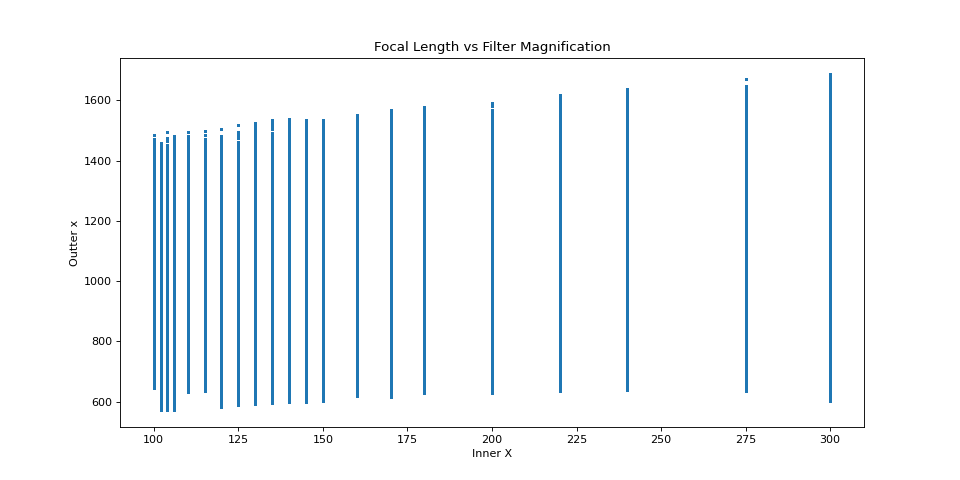

In [11]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
print("The list is " + str(len(data)) + " long")

np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<100]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(100*data[x,3])<100000]
data = np.array(data)
print("The list is now" + str(len(data)) + " long")

plotLenses(data[:,0], data[:,2], 'Focal Length vs Filter Magnification', "Inner X","Outter x",False)


In [20]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
#data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<3]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if 100*data[x,3]<55 and 100*data[x,3]>48]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(100*data[:,3], data[:,1]/data[:,3], 'Focal Length vs Filter Magnification', "Focal Length","Filter over Image Size",False)

The list is now 0 long


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

The list is now 159 long


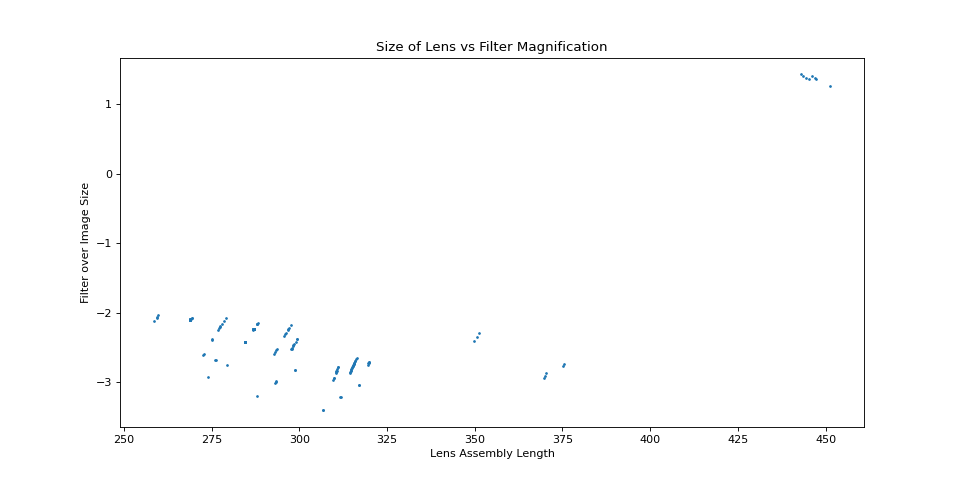

In [40]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]-data[x,7]-data[x,8]>43]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,2], data[:,1]/data[:,3], 'Size of Lens vs Filter Magnification', "Lens Assembly Length","Filter over Image Size",False)

The list is now 22 long


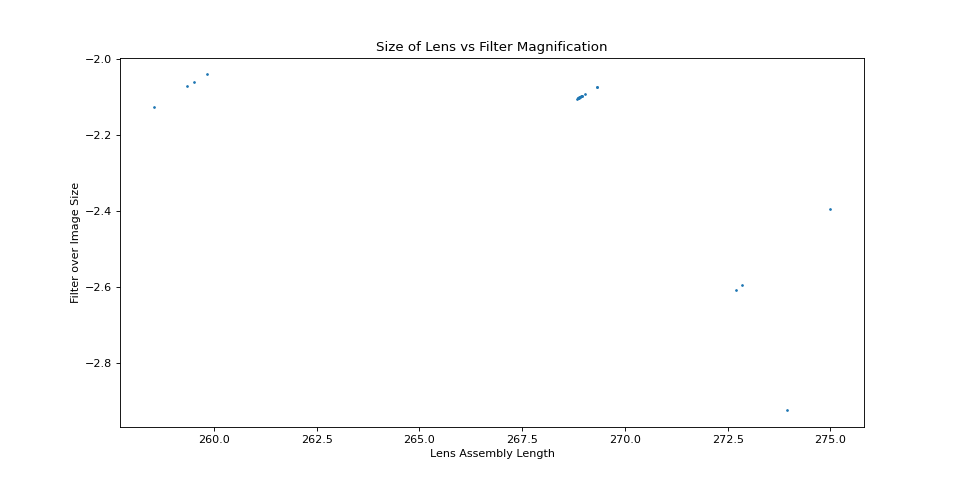

In [41]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<275]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(data[:,2], data[:,1]/data[:,3], 'Size of Lens vs Filter Magnification', "Lens Assembly Length","Filter over Image Size",False)

The list is now 22 long


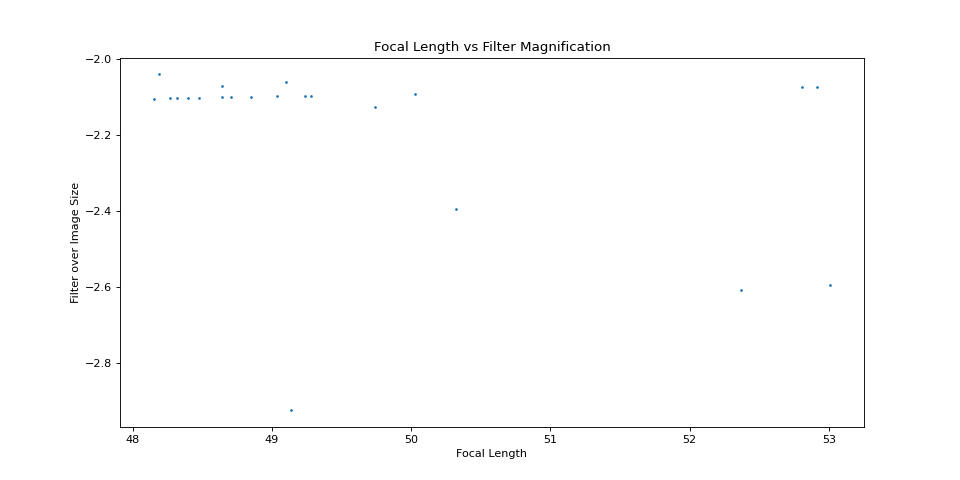

In [42]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])>1.5]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(100*data[:,3], data[:,1]/data[:,3], 'Focal Length vs Filter Magnification', "Focal Length","Filter over Image Size",False)

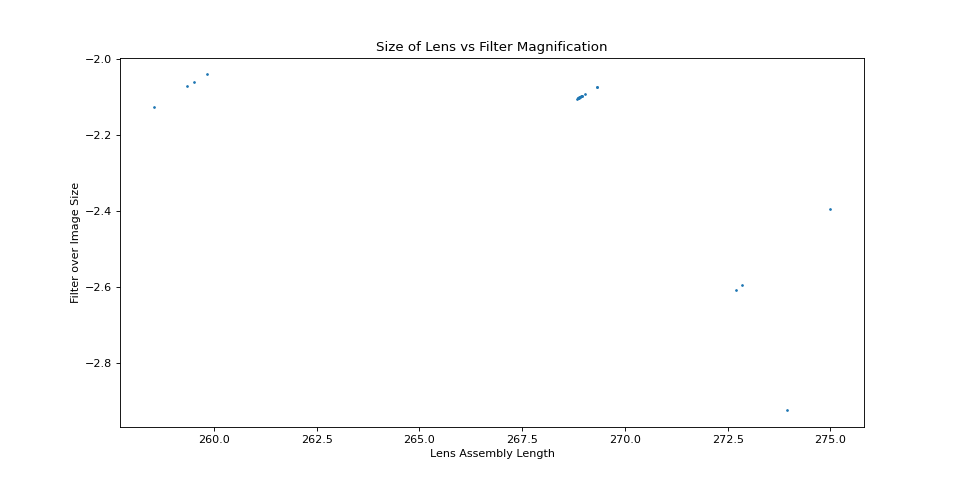

In [43]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y

plotLenses(data[:,2], data[:,1]/data[:,3], 'Size of Lens vs Filter Magnification', "Lens Assembly Length","Filter over Image Size",False)

In [31]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,7]>20]
data = np.array(data)
np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<1.55]
data = np.array(data)

print("The list is now " + str(len(data)) + " long")

plotLenses(100*data[:,3], data[:,1]/data[:,3], 'Focal Length vs Filter Magnification', "Focal Length","Filter over Image Size",False)

The list is now 0 long


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [14]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
for i in np.arange(0,15,1):
    #EXAMPLE:intersection of two rays put through an optical system, as well as graphic output of said rays
    lens1Focal = data[i,4]
    lens2Focal = data[i,5]
    lens3Focal = data[i,6]
    gap1 = data[i,7]
    gap2 = data[i,8]
    lens1 = opticalSystem(lens1Focal, gap1, lens2Focal, gap2, lens3Focal)
    rays = imageRays(9999,1000,10,25)

    x = []
    y = []

    for i in range(0,len(rays[:,0]),1):
        tracedRay = lens1.simRay(rays[i,0],rays[i,1])
        x.append(tracedRay[0])
        y.append(tracedRay[1])

    plt.figure(figsize=(12, 6), dpi=80)
    plt.ylim((-10, 10))
    for i in range(0,len(rays[:,0]),1):
        plt.plot(x[i],y[i],'b',linewidth=0.5)


    plt.axvline(x = 0, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap1, color = 'k', label = 'axvline - full height')
    plt.axvline(x = gap2+gap1, color = 'k', label = 'axvline - full height')


    images = intersection(x[0],y[0],x[9],y[9])
    plt.plot(images[:,0],images[:,1],'k*')

TypeError: opticalSystem.__init__() takes 3 positional arguments but 6 were given

In [45]:
# params ordered inner image x, " y, outer image x, " y, focal length 1, 2, 3, gap1, gap2, optical center x, "y
print(data[:,[4,5,6]])

[[ 108. -643.   67.]
 [ 108. -570.   67.]
 [ 108.  121.   67.]
 [ 108.  125.   67.]
 [ 108.  127.   67.]
 [ 108.  130.   67.]
 [ 108.  133.   67.]
 [ 108.  140.   67.]
 [ 108.  143.   67.]
 [ 108.  150.   67.]
 [ 108.  160.   67.]
 [ 108.  172.   67.]
 [ 108.  175.   67.]
 [ 108.  245.   67.]
 [ 121. -135.   70.]
 [ 125.  245.   67.]
 [ 130. -643.   67.]
 [ 130. -570.   67.]
 [ 130.  172.   67.]
 [ 130.  175.   67.]
 [ 133.  150.   67.]
 [ 140.  245.   67.]]
